Accuracy=0.7143 | Precision=0.6087 | Recall=0.5185 | F1=0.5600


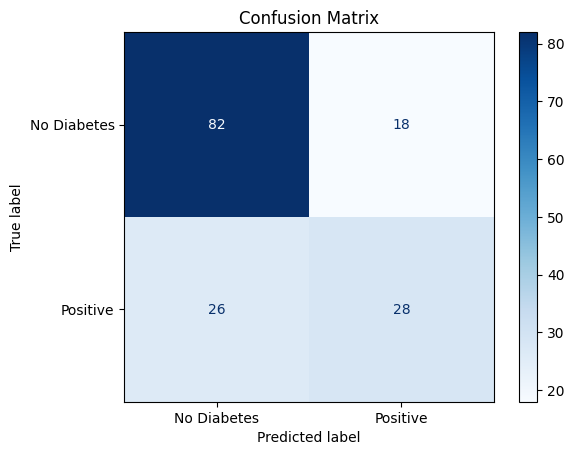

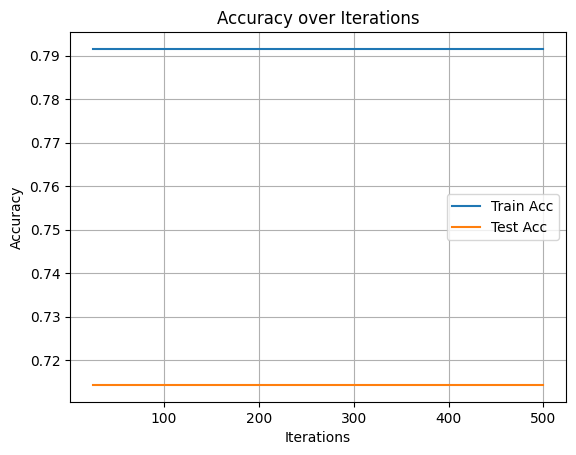

In [8]:
######## Mohammadmilad Sayyad ######


# === Problem 1: Logistic Regression on Diabetes Dataset ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 1) Load data
df = pd.read_csv("/content/diabetes.csv")
X, y = df.drop('Outcome', axis=1), df['Outcome']

# 2) Split (80% train / 20% test) and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# 3) Train model and record accuracy over iterations
train_acc, test_acc = [], []
for i in range(25, 525, 25):
    m = LogisticRegression(max_iter=i, solver='lbfgs')
    m.fit(X_train, y_train)
    train_acc.append(m.score(X_train, y_train))
    test_acc.append(m.score(X_test, y_test))
model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(X_train, y_train)

# 4) Evaluate
y_pred = model.predict(X_test)
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
print(f"Accuracy={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

# 5) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['No Diabetes','Positive']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 6) Accuracy curve
plt.plot(range(25,525,25), train_acc, label='Train Acc')
plt.plot(range(25,525,25), test_acc, label='Test Acc')
plt.title("Accuracy over Iterations")
plt.xlabel("Iterations"); plt.ylabel("Accuracy")
plt.legend(); plt.grid(True); plt.show()
